## Motivation

Every two years, every member of the United States House of Representatives is up for election. After being elected, members of the House are given a set budget from the legislature itself to hire staff, buy office equipment, and defray other costs of legislating and addressing constituent concerns. While each office gets the same amount of money from Congress to spend on these purposes, congressional offices have discretion over how that allowance is actually spent, and we would like to see whether some spending patterns are associated with higher political success. 

# Part 1: Getting/Formatting the Data

For this project, we decided to use the [House Office Expenditure Data](https://www.propublica.org/datastore/dataset/house-office-expenditures) from ProPublica as it contains well formatted data about house expenditures from 2009 to 2018. The main downside of this dataset is that it is missing data from the most recent midterm election, but we still have almost 10 years of data to work with.

To programatically access the datasets we are working with, we have included copies here [repository](https://github.com/AndrewTrackim/cmsc320-final/raw/master/house-expenditure/).

In [24]:
import pandas as pd
# just finna test with one of the files to see what happens
frames = []
# #manually add stuff for 2009 since only Q3 and Q4 are present
# frames.append(pd.read_csv('https://github.com/AndrewTrackim/cmsc320-final/raw/master/house-expenditure/2009Q3-house-disburse-detail.csv').dropna(subset = ['BIOGUIDE_ID']))
# frames.append(pd.read_csv('https://github.com/AndrewTrackim/cmsc320-final/raw/master/house-expenditure/2009Q4-house-disburse-detail.csv').dropna(subset = ['BIOGUIDE_ID']))


#automate the dataframes from 2010 to 2017
for i in range(2010, 2021):
    for j in range(1, 5):
        df = pd.read_csv('house-expenditure/' + str(i) + 'Q' + str(j) +'-house-disburse-detail.csv', thousands=',')
        df.dropna(subset = ['BIOGUIDE_ID'], inplace=True)
        df["QUARTER"] = str(i) + 'Q' + str(j)#df.apply(lambda row: str(i) + 'Q' + str(j))
        df["YEAR"] = i
        frames.append(df)

house_data = pd.concat(frames)
house_data

/tmp/ipykernel_23109/4255679013.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('house-expenditure/' + str(i) + 'Q' + str(j) +'-house-disburse-detail.csv', thousands=',')
/tmp/ipykernel_23109/4255679013.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('house-expenditure/' + str(i) + 'Q' + str(j) +'-house-disburse-detail.csv', thousands=',')
/tmp/ipykernel_23109/4255679013.py:12: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('house-expenditure/' + str(i) + 'Q' + str(j) +'-house-disburse-detail.csv', thousands=',')


,BIOGUIDE_ID,OFFICE,QUARTER,CATEGORY,DATE,PAYEE,START DATE,END DATE,PURPOSE,AMOUNT,...,RECORDID,RECIP (orig.),PROGRAM,SORT SEQUENCE,SORT SUBTOTAL DESCRIPTION,TRANSACTION DATE,DATA SOURCE,DOCUMENT,AMOUNT,id
7597,A000014,HON. NEIL ABERCROMBIE,2010Q1,FRANKED MAIL,NaN,02­22 O4 NW201000101 UNITED STATES PO...,01/03/10,01/31/10,FRANKED MAIL,126.58,...,NaN,02­22 O4 NW201000101 UNITED STATES PO...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7598,A000014,HON. NEIL ABERCROMBIE,2010Q1,FRANKED MAIL,NaN,03­25 O4 NW201000200 UNITED STATES PO...,02/01/10,02/28/10,FRANKED MAIL,1112.16,...,NaN,03­25 O4 NW201000200 UNITED STATES PO...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7599,A000014,HON. NEIL ABERCROMBIE,2010Q1,PERSONNEL COMPENSATION,NaN,"ADAMS,LEE-ANN E",01/03/10,03/31/10,MILITARY LIAISON,21266.67,...,NaN,"ADAMS,LEE-ANN E",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7600,A000014,HON. NEIL ABERCROMBIE,2010Q1,PERSONNEL COMPENSATION,NaN,"ASSELBAYE, AMY",01/03/10,02/28/10,CHIEF OF STAFF,21750.00,...,NaN,"ASSELBAYE, AMY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7601,A000014,HON. NEIL ABERCROMBIE,2010Q1,PERSONNEL COMPENSATION,NaN,"CHAN,GLORIA S",02/01/10,02/28/10,SHARED EMPLOYEE,4500.00,...,NaN,"CHAN,GLORIA S",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76254,Z000017,2020 HON. LEE M. ZELDIN,2020Q4,PERSONNEL COMPENSATION,,BROWN KEITH J.,2020-10-01,2020-12-31,DISTRICT OFFICE PAID INTERN -,5000.01,...,,NaN,INTERN ALLOWANCES,DETAIL,NaN,NaN,NaN,NaN,NaN,NaN
76255,Z000017,2020 HON. LEE M. ZELDIN,2020Q4,PERSONNEL COMPENSATION,,ULLOA GABRIELA M.,2020-10-01,2020-12-11,DISTRICT OFFICE PAID INTERN -,3944.45,...,,NaN,INTERN ALLOWANCES,DETAIL,NaN,NaN,NaN,NaN,NaN,NaN
76256,Z000017,2020 HON. LEE M. ZELDIN,2020Q4,PERSONNEL COMPENSATION,,,,,PERSONNEL COMPENSATION TOTALS:,8944.46,...,,NaN,INTERN ALLOWANCES,SUBTOTAL,NaN,NaN,NaN,NaN,NaN,NaN
76257,Z000017,2020 HON. LEE M. ZELDIN,2020Q4,PERSONNEL COMPENSATION,,,,,INTERN ALLOWANCES TOTALS:,8944.46,...,,NaN,INTERN ALLOWANCES,SUBTOTAL,NaN,NaN,NaN,NaN,NaN,NaN


[election data](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/IG0UN2)

In [25]:
election_data = pd.read_csv('house-expenditure/1976-2020-house.csv')

# filter out the years before 2009 and after 2018
election_data = election_data[election_data['year'] >= 2009]
election_data = election_data[election_data['year'] <= 2020]

#split candidate names into first and last
election_data['first_name'] = election_data['candidate'].apply(lambda x: x.split(' ')[0])
election_data['last_name'] = election_data['candidate'].apply(lambda x: x.split(' ')[-1])

election_data

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,...,party,writein,mode,candidatevotes,totalvotes,unofficial,version,fusion_ticket,first_name,last_name
22553,2010,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,NaN,...,CONSTITUTION,False,TOTAL,26357,156281,False,20220331,False,DAVID,WALTER
22554,2010,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,NaN,...,REPUBLICAN,False,TOTAL,129063,156281,False,20220331,False,JO,BONNER
22555,2010,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,NaN,...,NaN,True,TOTAL,861,156281,False,20220331,False,WRITEIN,WRITEIN
22556,2010,ALABAMA,AL,1,63,41,US HOUSE,2,GEN,NaN,...,DEMOCRAT,False,TOTAL,106865,219028,False,20220331,False,BOBBY,BRIGHT
22557,2010,ALABAMA,AL,1,63,41,US HOUSE,2,GEN,NaN,...,REPUBLICAN,False,TOTAL,111645,219028,False,20220331,False,MARTHA,ROBY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31098,2020,WYOMING,WY,56,83,68,US HOUSE,0,GEN,False,...,DEMOCRAT,False,TOTAL,66576,278503,False,20220331,False,LYNNETTE,BULL
31099,2020,WYOMING,WY,56,83,68,US HOUSE,0,GEN,False,...,NaN,False,TOTAL,1274,278503,False,20220331,False,OVERVOTES,OVERVOTES
31100,2020,WYOMING,WY,56,83,68,US HOUSE,0,GEN,False,...,LIBERTARIAN,False,TOTAL,10154,278503,False,20220331,False,RICHARD,BRUBAKER
31101,2020,WYOMING,WY,56,83,68,US HOUSE,0,GEN,False,...,NaN,False,TOTAL,6337,278503,False,20220331,False,UNDERVOTES,UNDERVOTES


Try to figure out what categories we are working with and how these categories should be group into broader categories

In [26]:
from collections import defaultdict
categories = defaultdict(lambda: 0)
def add_set(row):
      categories[row['CATEGORY']] += 1

#apply add_set to the house_data
house_data.apply(add_set, axis = 1);
categories

defaultdict(<function __main__.<lambda>()>,
            {'FRANKED MAIL': 115063,
             'PERSONNEL COMPENSATION': 483547,
             'TRAVEL': 848368,
             'RENT, COMMUNICATION, UTILITIES': 598709,
             'PRINTING AND REPRODUCTION': 160477,
             'OTHER SERVICES': 191434,
             'SUPPLIES AND MATERIALS': 678484,
             'EQUIPMENT': 126751,
             'PERSONNEL BENEFITS': 122,
             'TRANSPORTATION OF THINGS': 636,
             'RENT COMMUNICATION UTILITIES': 18459,
             'RENT  COMMUNICATION  UTILITIES': 276375,
             'BENEFITS TO FORMER PERSONNEL': 5,
             nan: 84545})

In [27]:
replace = {
    'RENT  COMMUNICATION  UTILITIES': 'RENT, COMMUNICATION, UTILITIES',
    'RENT COMMUNICATION UTILITIES': 'RENT, COMMUNICATION, UTILITIES'
}
house_data.replace(to_replace=replace, value=None, inplace=True)
categories = defaultdict(lambda: 0)
def add_set(row):
      categories[row['CATEGORY']] += 1
      
house_data.apply(add_set, axis = 1);
categories

defaultdict(<function __main__.<lambda>()>,
            {'FRANKED MAIL': 115063,
             'PERSONNEL COMPENSATION': 483547,
             'TRAVEL': 848368,
             'RENT, COMMUNICATION, UTILITIES': 598709,
             'PRINTING AND REPRODUCTION': 160477,
             'OTHER SERVICES': 191434,
             'SUPPLIES AND MATERIALS': 678484,
             'EQUIPMENT': 126751,
             'PERSONNEL BENEFITS': 122,
             'TRANSPORTATION OF THINGS': 636,
             'RENT COMMUNICATION UTILITIES': 18459,
             'RENT  COMMUNICATION  UTILITIES': 276375,
             'BENEFITS TO FORMER PERSONNEL': 5,
             nan: 84545})

In [28]:
import numpy as np
quarters = house_data['QUARTER'].unique()
categories = house_data['CATEGORY'].unique()

quarter = quarters[0]
hd_by_quarter = house_data[house_data['QUARTER'] == quarter]
bio_ids = hd_by_quarter['BIOGUIDE_ID'].unique()


spending_per_candidate = hd_by_quarter.groupby(['BIOGUIDE_ID','CATEGORY'])['AMOUNT'].sum()
spending_data = []
for bio_id in bio_ids:
    row = [bio_id]
    for category in categories:
        if category in spending_per_candidate[bio_id]:
            row.append(spending_per_candidate[bio_id][category])
        else:
            row.append(np.nan)
    spending_data.append(row)
quarter_spending_df = pd.DataFrame(spending_data,columns = ["BIOGUIDE_ID"] + categories.tolist())
quarter_spending_df
# spending_per_candidate.to_csv('spending_per_candidate_' + quarter + '.csv')

,BIOGUIDE_ID,FRANKED MAIL,PERSONNEL COMPENSATION,TRAVEL,"RENT, COMMUNICATION, UTILITIES",PRINTING AND REPRODUCTION,OTHER SERVICES,SUPPLIES AND MATERIALS,EQUIPMENT,PERSONNEL BENEFITS,TRANSPORTATION OF THINGS,RENT COMMUNICATION UTILITIES,RENT COMMUNICATION UTILITIES,BENEFITS TO FORMER PERSONNEL,NaN
0,A000014,1498.61,259540.31,10891.59,21084.39,43.90,8348.02,4661.75,981.30,NaN,NaN,NaN,NaN,NaN,NaN
1,A000022,21011.90,242972.84,3655.22,33422.01,9794.18,21341.00,17776.34,2033.33,NaN,NaN,NaN,NaN,NaN,NaN
2,A000055,1671.92,264937.16,10360.45,19145.14,2130.92,11644.95,8005.85,601.50,NaN,NaN,NaN,NaN,NaN,NaN
3,A000364,85906.29,199660.40,7925.65,27119.41,75410.20,30479.70,6095.27,3894.33,NaN,NaN,NaN,NaN,NaN,NaN
4,A000358,40746.81,259704.20,6721.87,24703.34,45627.10,12367.41,6997.48,3610.12,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,W000738,1915.74,287973.39,8856.64,31708.60,3499.00,22269.30,28286.33,5446.51,NaN,NaN,NaN,NaN,NaN,NaN
444,W000793,71932.63,256480.86,19270.10,22324.77,82727.10,21301.95,7476.39,319.94,NaN,NaN,NaN,NaN,NaN,NaN
445,Y000062,2559.73,228275.01,12802.14,26823.40,3827.33,15048.04,30734.86,9417.36,NaN,NaN,NaN,NaN,NaN,NaN
446,Y000031,14009.20,221852.76,16874.49,33206.21,4133.02,13451.60,7143.06,948.00,NaN,NaN,NaN,NaN,NaN,NaN


## Predicting Election Results

We can see if there is some correlation between the proportions that senators spend on each category and whether or not they get re-elected. We can possibly use this to make a predictor for whether or not a person will get reelected.

To make a regression of this data, I will need to have a column for each type of expenditure. I will do this by summing up each category of expense by YEAR and BUIOGUIDE_ID.

# THIS BLOCK IS DUPLICATE FROM ARJUN BRANCH

In [29]:
import requests
from bs4 import BeautifulSoup
raw = requests.get("https://www.congress.gov/help/field-values/member-bioguide-ids")
soup = BeautifulSoup(raw.text, 'lxml')
table = soup.find('table')

# Since the entire thing is a formatted table, read it directly into a pandas dataframe
tabledf = pd.read_html(str(table))
tabledf = tabledf[0]
tabledf.dropna(subset = ['Member'], inplace=True)
tabledf.reset_index(drop=True, inplace=True)
members = tabledf['Member'].str.extractall("(.*), (.*) \((.*) - (.*)\)")

members.reset_index(drop=True, inplace=True)
members.rename(columns={0 : 'LASTNAME', 1: "FIRSTNAME", 2: "PARTY", 3: "STATE"}, inplace=True)
members['BIOGUIDE_ID'] = tabledf['Member ID']
members['LASTNAME'] = members['LASTNAME'].apply(lambda x: x.upper())
members['FIRSTNAME'] = members['FIRSTNAME'].apply(lambda x: x.split(' ')[0].upper())
members

,LASTNAME,FIRSTNAME,PARTY,STATE,BIOGUIDE_ID
0,ABDNOR,JAMES,Republican,South Dakota,A000009
1,ABERCROMBIE,NEIL,Democratic,Hawaii,A000014
2,ABOUREZK,JAMES,Democratic,South Dakota,A000017
3,ABRAHAM,RALPH,Republican,Louisiana,A000374
4,ABRAHAM,SPENCER,Republican,Michigan,A000355
...,...,...,...,...,...
2422,ZINKE,RYAN,Republican,Montana,Z000018
2423,ZION,ROGER,Republican,Indiana,Z000010
2424,ZORINSKY,EDWARD,Democratic,Nebraska,Z000013
2425,ZSCHAU,EDWIN,Republican,California,Z000014


In [34]:
years = house_data['YEAR'].unique()
categories = house_data['CATEGORY'].unique()

year = years[0]



spending_per_candidate = house_data.groupby(['YEAR', 'BIOGUIDE_ID','CATEGORY'])['AMOUNT'].sum()

spending_data = []
for year in years:
    for bio_id in bio_ids:
        # set the row to be the bio_id and year
        if bio_id in spending_per_candidate[year]:
            row = [bio_id, year]
            for category in categories:
                if category in spending_per_candidate[year][bio_id]:
                    row.append(spending_per_candidate[year][bio_id][category])
                else:
                    row.append(np.nan)
            spending_data.append(row)

year_spending_df = pd.DataFrame(spending_data,columns = ["BIOGUIDE_ID", "YEAR"] + categories.tolist())

# replace the NaNs with 0
year_spending_df.fillna(0, inplace=True)
year_spending_df

# combine totals for years into pairs of two

,BIOGUIDE_ID,YEAR,FRANKED MAIL,PERSONNEL COMPENSATION,TRAVEL,"RENT, COMMUNICATION, UTILITIES",PRINTING AND REPRODUCTION,OTHER SERVICES,SUPPLIES AND MATERIALS,EQUIPMENT,PERSONNEL BENEFITS,TRANSPORTATION OF THINGS,RENT COMMUNICATION UTILITIES,RENT COMMUNICATION UTILITIES,BENEFITS TO FORMER PERSONNEL,NaN
0,A000014,2010,2266.98,399676.44,16006.37,40029.73,809.17,21790.94,8060.10,1561.64,0.0,0.00,0.0,0.00,0.0,0.0
1,A000022,2010,57369.91,809865.31,12088.22,94258.63,32823.68,47198.47,57789.15,3378.11,0.0,0.00,0.0,0.00,0.0,0.0
2,A000055,2010,6366.69,844798.48,59921.19,61797.60,10534.11,34825.20,35934.66,19814.71,0.0,0.00,0.0,0.00,0.0,0.0
3,A000364,2010,132494.41,560056.62,24049.16,80818.63,145486.95,52175.64,16258.35,11966.76,0.0,0.00,0.0,0.00,0.0,0.0
4,A000358,2010,47826.63,804843.19,20078.96,66744.24,46618.69,38674.55,26022.08,6967.16,0.0,0.00,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3284,W000800,2020,4102.12,2330629.98,31647.66,0.00,6537.50,98129.36,38059.72,2911193.80,0.0,0.00,0.0,209715.18,0.0,0.0
3285,W000795,2020,89551.16,2366490.20,69031.00,0.00,86919.50,95922.86,41386.76,3013860.50,0.0,0.00,0.0,234152.42,0.0,0.0
3286,W000804,2020,174836.02,1983040.08,17481.62,0.00,222280.44,92328.02,48799.96,2946710.50,0.0,695.24,0.0,333150.92,0.0,0.0
3287,Y000062,2020,2543.44,2102716.72,38663.88,0.00,1560.00,78669.12,47666.80,2417204.00,0.0,0.00,0.0,237565.28,0.0,0.0


Since house elections only happen every 2 years, I will sum up adjacent years prior to an election for the sake of this regression. For example, the data for 2017 and 2018 will be added and categorized as 2018 since those are the years after the 2016 election but (mostly) before the 2018 elections.

In [79]:
parts = []

def helper(x):
    years = house_data['YEAR'].unique()
    # add together the first two years  
    if years[0] % 2 == 1:
        start = 0
    else:
        start = 1
    #add together the first 2 columns of x
    for i in range(start, len(years), 2):
        # sum together the money amoutns for the two years
        row = x[i:i+2].sum()

        #fix bioguide id and year since those also got summed
        row['YEAR'] = int(years[i+1])
        row['BIOGUIDE_ID'] = x[0:1]["BIOGUIDE_ID"].values[0]

        # add together all the other columns and then change values to proportions
        
        sum = 0
        for category in categories:
            sum += row[category]

        # now calculate the proportions
        success = True
        for category in categories:
            if sum == 0:
                #row[category] = row[category] / sum
                success = False
        
        # if the sum is 0, then they weren't in office for the years so they shouldn't be included
        if success:
            parts.append(row)
        
        # Now check whether or not they won the election for that year
            
year_spending_df.groupby('BIOGUIDE_ID').apply(helper)
merged_years_df = pd.DataFrame(parts)

# get the mean and std of each column
mean = merged_years_df.mean()
std = merged_years_df.std()

def normalize(df):
    for category in categories:
        df[category] = (df[category] - mean[category]) / std[category]
    return df
merged_years_df = merged_years_df.apply(normalize, axis=1)


# add party and name info
merged_years_df = merged_years_df.merge(members, on='BIOGUIDE_ID')
# replace the NaNs with 0
merged_years_df.fillna(0, inplace=True)
merged_years_df

/tmp/ipykernel_23109/2596580430.py:42: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = merged_years_df.mean()
/tmp/ipykernel_23109/2596580430.py:43: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = merged_years_df.std()
/tmp/ipykernel_23109/2596580430.py:47: RuntimeWarning: invalid value encountered in double_scalars
  df[category] = (df[category] - mean[category]) / std[category]


,BIOGUIDE_ID,YEAR,FRANKED MAIL,PERSONNEL COMPENSATION,TRAVEL,"RENT, COMMUNICATION, UTILITIES",PRINTING AND REPRODUCTION,OTHER SERVICES,SUPPLIES AND MATERIALS,EQUIPMENT,PERSONNEL BENEFITS,TRANSPORTATION OF THINGS,RENT COMMUNICATION UTILITIES,RENT COMMUNICATION UTILITIES,BENEFITS TO FORMER PERSONNEL,NaN,LASTNAME,FIRSTNAME,PARTY,STATE
0,A000014,2012,-0.677000,-1.532344,-1.173393,-1.046086,-0.641373,-1.426219,-0.339811,-0.535695,0.042436,-0.095902,-0.391457,-0.503196,0.0,0.0,ABERCROMBIE,NEIL,Democratic,Hawaii
1,A000022,2012,0.187964,0.143127,-0.748618,1.556610,-0.282926,0.449951,-0.050082,-0.506977,0.042436,-0.095902,-0.391457,-0.503196,0.0,0.0,ACKERMAN,GARY,Democratic,New York
2,A000022,2014,-0.676630,-1.528635,-1.085804,-1.029420,-0.590347,-1.335870,-0.335731,-0.534927,0.042436,6.591692,-0.391457,-0.503196,0.0,0.0,ACKERMAN,GARY,Democratic,New York
3,A000055,2012,-0.439228,0.053290,0.699872,0.384770,-0.396543,0.669759,-0.138329,-0.495293,0.042436,-0.095902,-0.391457,-0.503196,0.0,0.0,ADERHOLT,ROBERT,Republican,Alabama
4,A000055,2014,-0.436610,-0.005801,0.589665,0.537101,-0.438894,0.037368,-0.049047,-0.506245,0.042436,-0.095902,-0.391457,-0.503196,0.0,0.0,ADERHOLT,ROBERT,Republican,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,Y000062,2012,-0.502913,0.076616,0.507631,0.592028,-0.251557,0.009811,-0.160289,-0.509955,0.042436,-0.095902,-0.391457,-0.503196,0.0,0.0,YARMUTH,JOHN,Democratic,Kentucky
1491,Y000062,2014,-0.574719,-0.027308,-0.086706,0.371508,-0.400341,-0.311155,-0.221156,-0.529055,0.042436,-0.095902,-0.391457,-0.503196,0.0,0.0,YARMUTH,JOHN,Democratic,Kentucky
1492,Y000062,2016,-0.603730,0.061097,-0.351139,0.304218,-0.515874,-0.144653,-0.224790,-0.527206,0.042436,-0.095902,1.833147,-0.503196,0.0,0.0,YARMUTH,JOHN,Democratic,Kentucky
1493,Y000062,2018,-0.569061,0.999385,0.133808,-1.046086,-0.552709,0.532528,-0.168399,1.368449,0.042436,-0.095902,-0.391457,1.121682,0.0,0.0,YARMUTH,JOHN,Democratic,Kentucky


Now we need to add a column to represent whether they won or lost in that election year. If they didn't run for reelection that year, it will be NaN. Rows with NaN for the election result will be dropped since they didn't run in the election that year, meaning they aren't relevant to the correlation we are looking into. Some states like NY have the same candidate multiple times under different parties so we also need to handle summing up those counts.

In [80]:
merged_years_df['WIN'] = [0 for i in range(len(merged_years_df))]

def add_victory(row):
    # look up the row in the election data
    thing = election_data.loc[(election_data['last_name'] == row['LASTNAME']) & (election_data['year'] == row['YEAR']) & (election_data['first_name'] == row['FIRSTNAME'])]
    # set win column to 1 if they won
    if len(thing) == 1:
        if thing['totalvotes'].values[0] == 0:
            row['WIN'] = np.nan
        elif float(thing['candidatevotes'].values[0]) / float(thing['totalvotes'].values[0]) >= 0.5:
            row['WIN'] = 1
    elif len(thing) > 1:
        #in some places like NY, you can run in the same race under multiple parties, so we need to add these votes together for our calculation
        total_votes = 0
        for votes in thing['candidatevotes'].values:
            total_votes += votes
        
        if thing['totalvotes'].values[0] == 0:
            row['WIN'] = np.nan
        elif total_votes / float(thing['totalvotes'].values[0]) >= 0.5:
            row['WIN'] = 1
            
    else:
        row['WIN'] = np.nan
    
    return row

victory_df = merged_years_df.apply(add_victory, axis = 1)

#finally drop the rows with NaN in the win column
victory_df.dropna(subset = ['WIN'], inplace=True)
victory_df

,BIOGUIDE_ID,YEAR,FRANKED MAIL,PERSONNEL COMPENSATION,TRAVEL,"RENT, COMMUNICATION, UTILITIES",PRINTING AND REPRODUCTION,OTHER SERVICES,SUPPLIES AND MATERIALS,EQUIPMENT,...,TRANSPORTATION OF THINGS,RENT COMMUNICATION UTILITIES,RENT COMMUNICATION UTILITIES,BENEFITS TO FORMER PERSONNEL,NaN,LASTNAME,FIRSTNAME,PARTY,STATE,WIN
3,A000055,2012,-0.439228,0.053290,0.699872,0.384770,-0.396543,0.669759,-0.138329,-0.495293,...,-0.095902,-0.391457,-0.503196,0.0,0.0,ADERHOLT,ROBERT,Republican,Alabama,1.0
4,A000055,2014,-0.436610,-0.005801,0.589665,0.537101,-0.438894,0.037368,-0.049047,-0.506245,...,-0.095902,-0.391457,-0.503196,0.0,0.0,ADERHOLT,ROBERT,Republican,Alabama,1.0
5,A000055,2016,-0.433730,-0.030922,0.807789,0.452396,-0.421403,-0.499552,-0.056557,-0.500497,...,-0.095902,2.161162,-0.503196,0.0,0.0,ADERHOLT,ROBERT,Republican,Alabama,1.0
6,A000055,2018,-0.341127,0.675581,2.175038,-1.046086,-0.366897,-0.401589,-0.098144,1.176590,...,-0.095902,-0.391457,1.037565,0.0,0.0,ADERHOLT,ROBERT,Republican,Alabama,1.0
7,A000055,2020,-0.387530,1.982656,2.317399,-1.046086,0.032078,0.527991,0.576422,2.398928,...,-0.095902,-0.391457,1.644733,0.0,0.0,ADERHOLT,ROBERT,Republican,Alabama,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,Y000062,2012,-0.502913,0.076616,0.507631,0.592028,-0.251557,0.009811,-0.160289,-0.509955,...,-0.095902,-0.391457,-0.503196,0.0,0.0,YARMUTH,JOHN,Democratic,Kentucky,1.0
1491,Y000062,2014,-0.574719,-0.027308,-0.086706,0.371508,-0.400341,-0.311155,-0.221156,-0.529055,...,-0.095902,-0.391457,-0.503196,0.0,0.0,YARMUTH,JOHN,Democratic,Kentucky,1.0
1492,Y000062,2016,-0.603730,0.061097,-0.351139,0.304218,-0.515874,-0.144653,-0.224790,-0.527206,...,-0.095902,1.833147,-0.503196,0.0,0.0,YARMUTH,JOHN,Democratic,Kentucky,1.0
1493,Y000062,2018,-0.569061,0.999385,0.133808,-1.046086,-0.552709,0.532528,-0.168399,1.368449,...,-0.095902,-0.391457,1.121682,0.0,0.0,YARMUTH,JOHN,Democratic,Kentucky,1.0


TIME FOR SOME EXPLORATORY DATA ANALYSIS!!!!!!!!!!!!!

Make a violin plot for each of the categories.

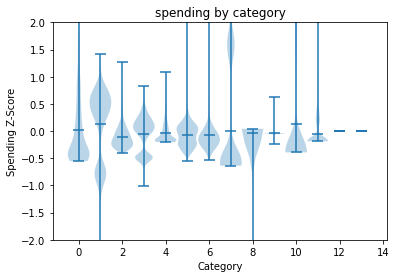

In [74]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# make an array of all the categoreis we want to plot
category_data = []
for category in categories:
    # get the data for the category
    category_data.append(victory_df[category].values)

#print (category_data)

ax.violinplot(category_data,range(len(categories)),widths=1,showmeans=True)
ax.set_xlabel("Category")
ax.set_ylabel("Spending Z-Score")
ax.set_title("spending by category")
plt. ylim(-2, 2)
fig.savefig("violin.png")

It's possible that different parties will spend their money in different ways, so let's take a look at violin plots split by party!

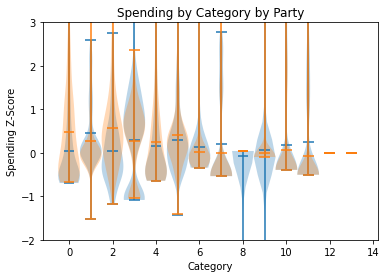

In [92]:
party_dfs = []

# split into two dfs for parties
victory_df.groupby('PARTY').apply(lambda x: party_dfs.append(x))

# now graph violins for each!
fig, ax = plt.subplots()

# make an array of all the categoreis we want to plot
for df in party_dfs:
    category_data = []
    for category in categories:
        # get the data for the category
        category_data.append(df[category].values)

    #print (category_data)
    ax.violinplot(category_data,range(len(categories)),widths=1,showmeans=True)

ax.set_xlabel("Category")
ax.set_ylabel("Spending Z-Score")
ax.set_title("Spending by Category by Party")
plt. ylim(-2, 3)
fig.savefig("partiesViolin.png")

We can see based on this violin plot that for most categories there isn't a massive difference between the two parties, but there is still a noticeable enough difference that it could be worth adding a party as an interaction variable.

Now that the data has been setup with columns representing each expense category as well as election results, we can see if there's a correlation between spending habits and election victory. To do this, I will first start off by training a model on each specific category to see if individual categories correlation with election success.

In [81]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.model_selection as ms
import sklearn.metrics as met

# use PERSONAL_COMPENSATION for ind and WIN for dep

y = victory_df['WIN']
non_nan = categories[0:len(categories)-1]
for category in non_nan:
    X = victory_df[[category]]
    ind_train, ind_test, dep_train, dep_test = ms.train_test_split(X, y, random_state=60)

    k_range = range(1, 10) # we will try k values from 1 to 10
    k_scores = []
    for k in k_range:
        neighbors = KNeighborsClassifier(n_neighbors=k)
        scores = ms.cross_val_score(neighbors, ind_train, dep_train, cv=10, scoring='precision')
        k_scores.append(scores.mean())

    # get the value of k with the highest cross-validated accuracy
    k = k_scores.index(max(k_scores)) + 1

    #train the dataset with the hyperparameter we just found
    neighbors = KNeighborsClassifier(n_neighbors=k)
    neighbors.fit(ind_train, dep_train)

    predicted = neighbors.predict(ind_test)
    acc = met.accuracy_score(dep_test, predicted, normalize=True, sample_weight=None)
    print("Accuracy:", acc)

    actual = np.array(dep_test)
    predictions = np.array(predicted)
    print(category + '\n' + str(met.confusion_matrix(actual, predictions)))

# now try a model on all categories
# ignore the last column since it is the NaN expense column
X = victory_df[non_nan]
ind_train, ind_test, dep_train, dep_test = ms.train_test_split(X, y, random_state=60)
k_range = range(1, 10) # we will try k values from 1 to 10
k_scores = []
for k in k_range:
    neighbors = KNeighborsClassifier(n_neighbors=k)
    scores = ms.cross_val_score(neighbors, ind_train, dep_train, cv=10, scoring='precision')
    k_scores.append(scores.mean())

# get the value of k with the highest cross-validated accuracy
k = k_scores.index(max(k_scores)) + 1

#train the dataset with the hyperparameter we just found
neighbors = KNeighborsClassifier(n_neighbors=k)
neighbors.fit(ind_train, dep_train)

predicted = neighbors.predict(ind_test)
acc = met.accuracy_score(dep_test, predicted, normalize=True, sample_weight=None)
print("Accuracy:", acc)

actual = np.array(dep_test)
predictions = np.array(predicted)
print("All" + '\n' + str(met.confusion_matrix(actual, predictions)))


Accuracy: 0.9419642857142857
FRANKED MAIL
[[  1   9]
 [  4 210]]
Accuracy: 0.9330357142857143
PERSONNEL COMPENSATION
[[  1   9]
 [  6 208]]
Accuracy: 0.9151785714285714
TRAVEL
[[  3   7]
 [ 12 202]]
Accuracy: 0.8660714285714286
RENT, COMMUNICATION, UTILITIES
[[  1   9]
 [ 21 193]]
Accuracy: 0.9419642857142857
PRINTING AND REPRODUCTION
[[  3   7]
 [  6 208]]
Accuracy: 0.8526785714285714
OTHER SERVICES
[[  3   7]
 [ 26 188]]
Accuracy: 0.8973214285714286
SUPPLIES AND MATERIALS
[[  5   5]
 [ 18 196]]
Accuracy: 0.9553571428571429
EQUIPMENT
[[  0  10]
 [  0 214]]
Accuracy: 0.9553571428571429
PERSONNEL BENEFITS
[[  0  10]
 [  0 214]]
Accuracy: 0.9553571428571429
TRANSPORTATION OF THINGS
[[  0  10]
 [  0 214]]
Accuracy: 0.9553571428571429
RENT COMMUNICATION UTILITIES
[[  0  10]
 [  0 214]]
Accuracy: 0.9553571428571429
RENT  COMMUNICATION  UTILITIES
[[  0  10]
 [  0 214]]
Accuracy: 0.9553571428571429
BENEFITS TO FORMER PERSONNEL
[[  0  10]
 [  0 214]]
Accuracy: 0.8526785714285714
All
[[  3   7]

In [111]:
from sklearn.tree import DecisionTreeClassifier

y = victory_df['WIN']
non_nan = categories[0:len(categories)-1]
for category in non_nan:
    X = victory_df[[category]]
    ind_train, ind_test, dep_train, dep_test = ms.train_test_split(X, y, random_state=60)

    k_range = range(1, 50) # we will try k values from 1 to 50
    k_scores = []
    for k in k_range:
        neighbors = DecisionTreeClassifier(max_depth=k)
        scores = ms.cross_val_score(neighbors, ind_train, dep_train, cv=10, scoring='precision')
        k_scores.append(scores.mean())

    # get the value of k with the highest cross-validated accuracy
    k = k_scores.index(max(k_scores)) + 1

    #train the dataset with the hyperparameter we just found
    neighbors = DecisionTreeClassifier(max_depth=k)
    neighbors.fit(ind_train, dep_train)

    predicted = neighbors.predict(ind_test)
    acc = met.precision_score(dep_test, predicted, sample_weight=None)
    print("Accuracy:", acc)

    actual = np.array(dep_test)
    predictions = np.array(predicted)
    print(category + '\n' + str(met.confusion_matrix(actual, predictions)))

# now try a model on all categories
# ignore the last column since it is the NaN expense column
X = victory_df[non_nan]
ind_train, ind_test, dep_train, dep_test = ms.train_test_split(X, y, random_state=60)
k_range = range(1, 50) # we will try k values from 1 to 10
k_scores = []
for k in k_range:
    neighbors = DecisionTreeClassifier(max_depth=k)
    scores = ms.cross_val_score(neighbors, ind_train, dep_train, cv=10, scoring='precision')
    k_scores.append(scores.mean())

# get the value of k with the highest cross-validated accuracy
k = k_scores.index(max(k_scores)) + 1

#train the dataset with the hyperparameter we just found
neighbors = DecisionTreeClassifier(max_depth=k)
neighbors.fit(ind_train, dep_train)

predicted = neighbors.predict(ind_test)
acc = met.accuracy_score(dep_test, predicted, normalize=True, sample_weight=None)
print("Accuracy:", acc)

actual = np.array(dep_test)
predictions = np.array(predicted)
print("All" + '\n' + str(met.confusion_matrix(actual, predictions)))

Accuracy: 0.9579439252336449
FRANKED MAIL
[[  1   9]
 [  9 205]]
Accuracy: 0.9547511312217195
PERSONNEL COMPENSATION
[[  0  10]
 [  3 211]]
Accuracy: 0.9665071770334929
TRAVEL
[[  3   7]
 [ 12 202]]
Accuracy: 0.9585253456221198
RENT, COMMUNICATION, UTILITIES
[[  1   9]
 [  6 208]]
Accuracy: 0.9638009049773756
PRINTING AND REPRODUCTION
[[  2   8]
 [  1 213]]
Accuracy: 0.9583333333333334
OTHER SERVICES
[[  1   9]
 [  7 207]]
Accuracy: 0.9592760180995475
SUPPLIES AND MATERIALS
[[  1   9]
 [  2 212]]
Accuracy: 0.9553571428571429
EQUIPMENT
[[  0  10]
 [  0 214]]
Accuracy: 0.9553571428571429
PERSONNEL BENEFITS
[[  0  10]
 [  0 214]]
Accuracy: 0.9553571428571429
TRANSPORTATION OF THINGS
[[  0  10]
 [  0 214]]
Accuracy: 0.9553571428571429
RENT COMMUNICATION UTILITIES
[[  0  10]
 [  0 214]]
Accuracy: 0.9553571428571429
RENT  COMMUNICATION  UTILITIES
[[  0  10]
 [  0 214]]
Accuracy: 0.9553571428571429
BENEFITS TO FORMER PERSONNEL
[[  0  10]
 [  0 214]]
Accuracy: 0.9241071428571429
All
[[  2   8]

It's clear from looking at these results that the data does seem to predict incumbency, but for some categories, it does predict some of the losses correctly. Could it be possible that the model could be more accurate if political party is also taken into account? We can make party into an interaction varible!

In [109]:
# add a new column for party_num (0 for dem, 1 for rep)
victory_df['party_num'] = victory_df['PARTY'].apply(lambda x: 0 if x == 'Democratic' else 1)

# Now let's redo the previous models but now with the party_num interaction variable
y = victory_df['WIN']
non_nan = categories[0:len(categories)-1]
for category in non_nan:
    X = victory_df[[category, 'party_num']]
    ind_train, ind_test, dep_train, dep_test = ms.train_test_split(X, y, random_state=60)

    k_range = range(1, 10) # we will try k values from 1 to 10
    k_scores = []
    for k in k_range:
        neighbors = KNeighborsClassifier(n_neighbors=k)
        scores = ms.cross_val_score(neighbors, ind_train, dep_train, cv=10, scoring='precision')
        k_scores.append(scores.mean())

    # get the value of k with the highest cross-validated accuracy
    k = k_scores.index(max(k_scores)) + 1

    #train the dataset with the hyperparameter we just found
    neighbors = KNeighborsClassifier(n_neighbors=k)
    neighbors.fit(ind_train, dep_train)

    predicted = neighbors.predict(ind_test)
    acc = met.accuracy_score(dep_test, predicted, normalize=True, sample_weight=None)
    print("Accuracy:", acc)

    actual = np.array(dep_test)
    predictions = np.array(predicted)
    print(category + '\n' + str(met.confusion_matrix(actual, predictions)))

# now try a model on all categories
# ignore the last column since it is the NaN expense column
X = victory_df[non_nan]
ind_train, ind_test, dep_train, dep_test = ms.train_test_split(X, y, random_state=60)
k_range = range(1, 10) # we will try k values from 1 to 10
k_scores = []
for k in k_range:
    neighbors = KNeighborsClassifier(n_neighbors=k)
    scores = ms.cross_val_score(neighbors, ind_train, dep_train, cv=10, scoring='precision')
    k_scores.append(scores.mean())

# get the value of k with the highest cross-validated accuracy
k = k_scores.index(max(k_scores)) + 1

#train the dataset with the hyperparameter we just found
neighbors = KNeighborsClassifier(n_neighbors=k)
neighbors.fit(ind_train, dep_train)

predicted = neighbors.predict(ind_test)
acc = met.accuracy_score(dep_test, predicted, normalize=True, sample_weight=None)
print("Accuracy:", acc)

actual = np.array(dep_test)
predictions = np.array(predicted)
print("All" + '\n' + str(met.confusion_matrix(actual, predictions)))

Accuracy: 0.9017857142857143
FRANKED MAIL
[[  1   9]
 [ 13 201]]
Accuracy: 0.84375
PERSONNEL COMPENSATION
[[  0  10]
 [ 25 189]]
Accuracy: 0.9553571428571429
TRAVEL
[[  0  10]
 [  0 214]]
Accuracy: 0.8928571428571429
RENT, COMMUNICATION, UTILITIES
[[  2   8]
 [ 16 198]]
Accuracy: 0.9553571428571429
PRINTING AND REPRODUCTION
[[  0  10]
 [  0 214]]
Accuracy: 0.9017857142857143
OTHER SERVICES
[[  3   7]
 [ 15 199]]
Accuracy: 0.8883928571428571
SUPPLIES AND MATERIALS
[[  1   9]
 [ 16 198]]
Accuracy: 0.9553571428571429
EQUIPMENT
[[  0  10]
 [  0 214]]
Accuracy: 0.9553571428571429
PERSONNEL BENEFITS
[[  0  10]
 [  0 214]]
Accuracy: 0.9553571428571429
TRANSPORTATION OF THINGS
[[  0  10]
 [  0 214]]
Accuracy: 0.9464285714285714
RENT COMMUNICATION UTILITIES
[[  0  10]
 [  2 212]]
Accuracy: 0.9375
RENT  COMMUNICATION  UTILITIES
[[  0  10]
 [  4 210]]
Accuracy: 0.9553571428571429
BENEFITS TO FORMER PERSONNEL
[[  0  10]
 [  0 214]]


/home/andrew/.virtualenvs/ds-venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/andrew/.virtualenvs/ds-venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/andrew/.virtualenvs/ds-venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/home/andrew/.virtualenvs/ds-venv/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 400, in _fit
  

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [108]:
y = victory_df['WIN']
non_nan = categories[0:len(categories)-1]
for category in non_nan:
    X = victory_df[[category, 'party_num']]
    ind_train, ind_test, dep_train, dep_test = ms.train_test_split(X, y, random_state=60)

    k_range = range(1, 50) # we will try k values from 1 to 50
    k_scores = []
    for k in k_range:
        neighbors = DecisionTreeClassifier(max_depth=k)
        scores = ms.cross_val_score(neighbors, ind_train, dep_train, cv=10, scoring='precision')
        k_scores.append(scores.mean())

    # get the value of k with the highest cross-validated accuracy
    k = k_scores.index(max(k_scores)) + 1

    #train the dataset with the hyperparameter we just found
    neighbors = DecisionTreeClassifier(max_depth=k)
    neighbors.fit(ind_train, dep_train)

    predicted = neighbors.predict(ind_test)
    acc = met.accuracy_score(dep_test, predicted, normalize=True, sample_weight=None)
    print("Accuracy:", acc)

    actual = np.array(dep_test)
    predictions = np.array(predicted)
    print(category + '\n' + str(met.confusion_matrix(actual, predictions)))

# now try a model on all categories
# ignore the last column since it is the NaN expense column
X = victory_df[non_nan]
ind_train, ind_test, dep_train, dep_test = ms.train_test_split(X, y, random_state=60)
k_range = range(1, 50) # we will try k values from 1 to 10
k_scores = []
for k in k_range:
    neighbors = DecisionTreeClassifier(max_depth=k)
    scores = ms.cross_val_score(neighbors, ind_train, dep_train, cv=10, scoring='precision')
    k_scores.append(scores.mean())

# get the value of k with the highest cross-validated accuracy
k = k_scores.index(max(k_scores)) + 1

#train the dataset with the hyperparameter we just found
neighbors = DecisionTreeClassifier(max_depth=k)
neighbors.fit(ind_train, dep_train)

predicted = neighbors.predict(ind_test)
acc = met.accuracy_score(dep_test, predicted, normalize=True, sample_weight=None)
print("Accuracy:", acc)

actual = np.array(dep_test)
predictions = np.array(predicted)
print("All" + '\n' + str(met.confusion_matrix(actual, predictions)))

Accuracy: 0.9196428571428571
FRANKED MAIL
[[  1   9]
 [  9 205]]
Accuracy: 0.9330357142857143
PERSONNEL COMPENSATION
[[  0  10]
 [  5 209]]
Accuracy: 0.9464285714285714
TRAVEL
[[  0  10]
 [  2 212]]
Accuracy: 0.9553571428571429
RENT, COMMUNICATION, UTILITIES
[[  1   9]
 [  1 213]]
Accuracy: 0.9508928571428571
PRINTING AND REPRODUCTION
[[  1   9]
 [  2 212]]
Accuracy: 0.9330357142857143
OTHER SERVICES
[[  1   9]
 [  6 208]]
Accuracy: 0.9508928571428571
SUPPLIES AND MATERIALS
[[  1   9]
 [  2 212]]
Accuracy: 0.9553571428571429
EQUIPMENT
[[  0  10]
 [  0 214]]
Accuracy: 0.9553571428571429
PERSONNEL BENEFITS
[[  0  10]
 [  0 214]]
Accuracy: 0.9553571428571429
TRANSPORTATION OF THINGS
[[  0  10]
 [  0 214]]
Accuracy: 0.9553571428571429
RENT COMMUNICATION UTILITIES
[[  0  10]
 [  0 214]]
Accuracy: 0.9553571428571429
RENT  COMMUNICATION  UTILITIES
[[  0  10]
 [  0 214]]
Accuracy: 0.9553571428571429
BENEFITS TO FORMER PERSONNEL
[[  0  10]
 [  0 214]]
Accuracy: 0.9151785714285714
All
[[  3   7]